In [1]:
using Pkg
Pkg.activate("..")

  Activating project at `~/Documents/repos/juDataNSOM`


In [2]:
using DataAnNSOM, LinearAlgebra,Interpolations,LaTeXStrings,Plots; pyplot()

┌ Info: Precompiling DataAnNSOM [2b288ba5-5bae-46b0-a503-45a1fdc6ef2f]
└ @ Base loading.jl:1664


Plots.PyPlotBackend()

In [3]:
mo,dy = 10,14; fi=2
nEl = 5
data,datAmp,datFase = DataAnNSOM.read_FileData(mo,dy,fi);
size(data)

(3, 2, 45)

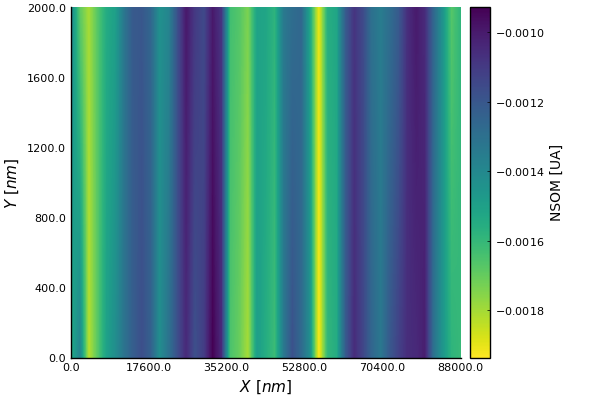

In [4]:

datIm = data[2,:,:]
labelT = "NSOM [UA]"

p1 = DataAnNSOM.plotImag(mo,dy,datIm, labelT,5,fi)
#p1 = hline!([1,1], c = :red, label=:none)
p2 = DataAnNSOM.plotProfile(mo,dy,datIm, labelT,5,1,fi);
#plot(p1,p2, size=(1200,400) )
p1

In [5]:
imArr = datIm
dataA,dataF = datAmp,datFase

DatArrA = DataAnNSOM.GetArrdat(imArr,dataA); DatArrF = DataAnNSOM.GetArrdat(imArr,dataF);

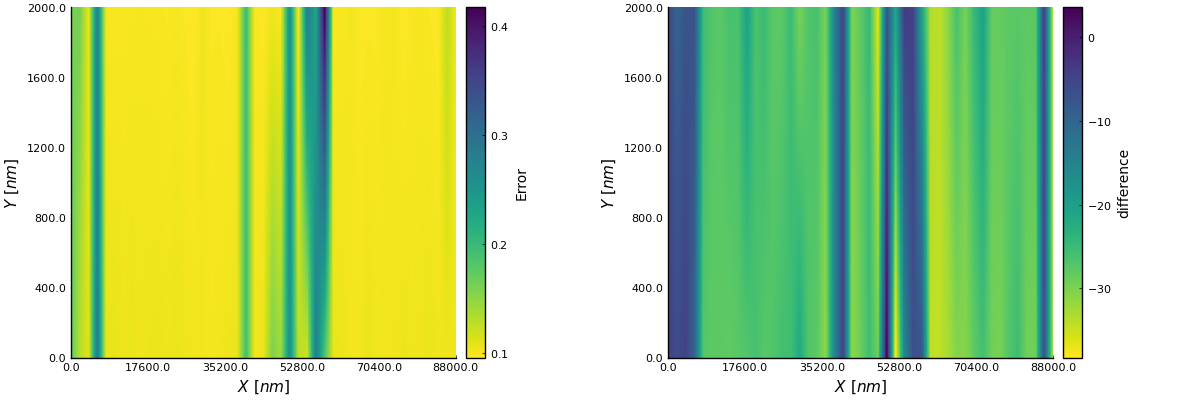

In [6]:
imErr = DataAnNSOM.getErrArr(DatArrA,imArr); imDif = DataAnNSOM.GetDifAmp(DatArrF,imArr);

pE = DataAnNSOM.plotImag(mo,dy,imErr, "Error",5,fi); pD = DataAnNSOM.plotImag(mo,dy,imDif, "difference",5,fi) 
plot(pE,pD, size=(1200,400))

# ===============================================

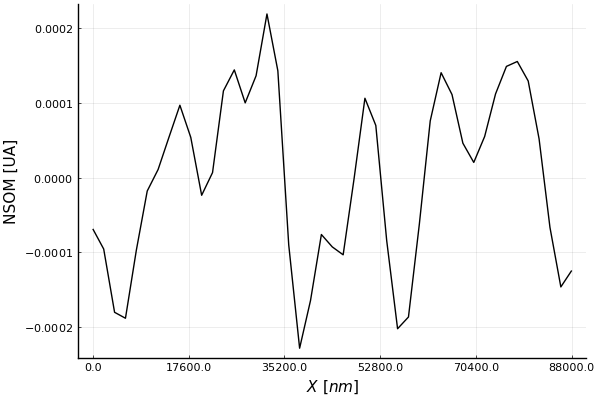

In [7]:
n0,nct = 8,5
datFiltr = DataAnNSOM.getFiltImag1(datIm,n0,nct)

DataAnNSOM.plotProfile(mo,dy,datFiltr, labelT,5,1,fi)

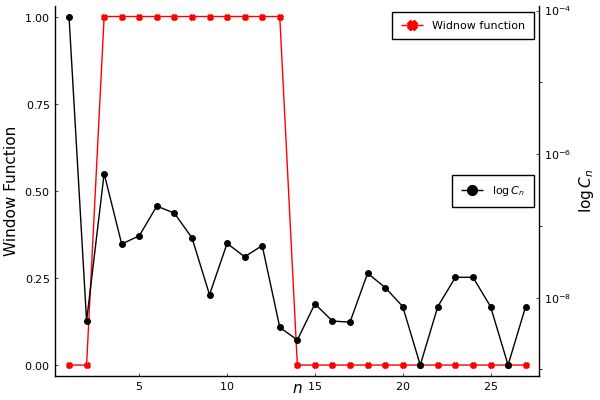

In [8]:
PSD,dataF = DataAnNSOM.GetFourierCoefs1(datIm[1,:])
_,indices = DataAnNSOM.GetFilteredData1(dataF,n0,nct)
DataAnNSOM.PlotFilter(PSD,indices)

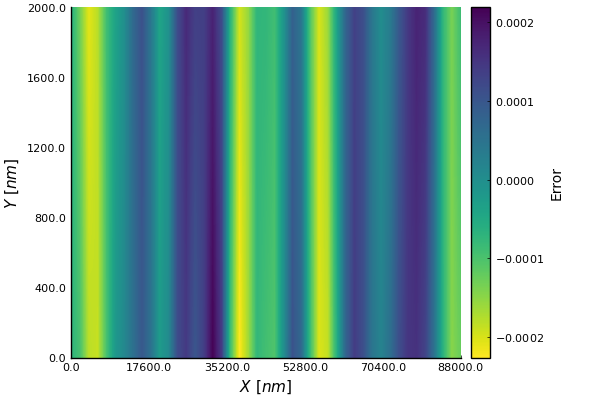

In [9]:
DataAnNSOM.plotImag(mo,dy,datFiltr, "Error",5,fi)

In [10]:
using FFTW

In [11]:
B₀(x,nc) =(1+((log(2)*x^2)/(nc^2)))*exp(-(log(2)*x^2)/(nc^2))

B₀ (generic function with 1 method)

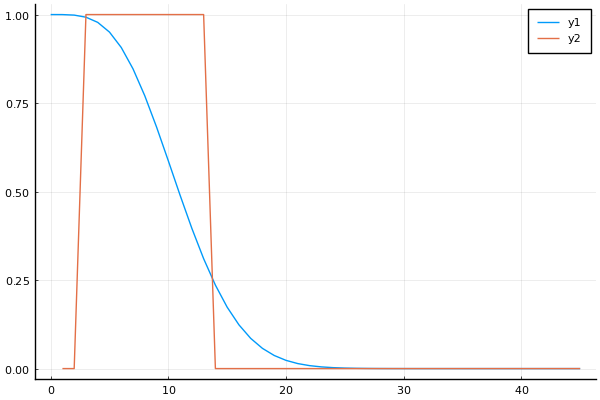

In [12]:
xGR = 0:1:45

plot(xGR,B₀.(xGR,7))
plot!(indices)

In [13]:
Recf(n0,nC,x) = (x ≤ n0+nC)&&(x ≥ n0-nC) ? 1 : 0 

Recf (generic function with 1 method)

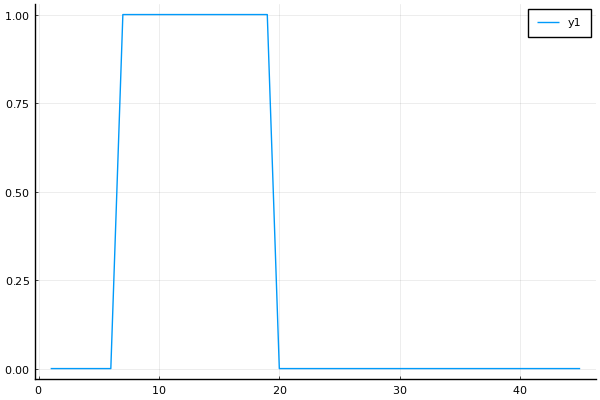

In [14]:
n0,nC = 13,6
n = 45

fW = zeros(n)
for i in 1:n
    fW[i] = Recf(n0,nC,i)
end
plot(fW)
